### Step 1: Libraries required 

In [ ]:
import pandas as pd #for excel data manipulation
import re #library for regular expressions
import pickle #Pickle is used to store data in a file on disk or as a byte string in memory. It is unreadable by user, but can store large datasets compared to alternatives like excel.
from sklearn.feature_extraction.text import CountVectorizer #sklearn class to convert group of text documents to a matrix of token counts
from sklearn.naive_bayes import MultinomialNB #sklearn class for implementing naive bayes classifier
from sklearn.model_selection import cross_val_score #sklearn class for cross validation evaluation

### Naive Bayes classification algorithm: 

#### What is the Naive Bayes Algorithm?

It is a classification technique based on Bayes’ Theorem with an independence assumption among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

An NB model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of computing posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:
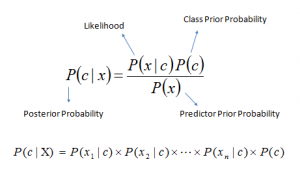

Above,
1. P(c|x) is the posterior probability of class (c, target) given          predictor (x, attributes).
2. P(c) is the prior probability of class.
3. P(x|c) is the likelihood which is the probability of the predictor      given class.
4. P(x) is the prior probability of the predictor.

Naive Bayes classifiers usually use Maximum Likelihood Estimation (MLE) to estimate the parameters of the probability distributions, which means that they estimate the probabilities of each feature given each class label from the training data. In the case of discrete features, this involves counting the number of occurrences of each feature in each class and dividing by the total number of occurrences of that class.

Once the probabilities have been estimated, the classifier can compute the posterior probability of each class label given a set of features using the above equation and then choose the class label with the highest probability as the prediction.

Naive Bayes classifiers are fast and efficient, especially when dealing with high-dimensional datasets. However, they can be prone to overfitting when there are too few training examples or when the features are highly correlated with each other. In practice, Naive Bayes classifiers often perform well on text classification tasks such as spam filtering, sentiment analysis, and topic classification.

#### How does Naive Bayes Algorithms work?

Training data set below, of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

Step 1: Convert the data set into a frequency table

Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.

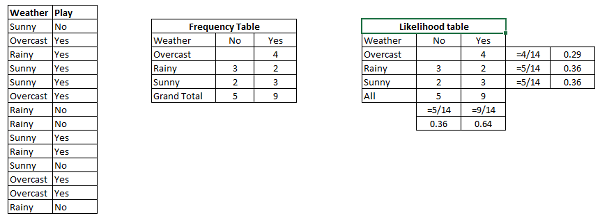

Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of the prediction.

Problem: Players will play if the weather is sunny. Is this statement correct?

We can solve it using the above-discussed method of posterior probability.

P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)

Here P( Sunny | Yes) * P(Yes) is in the numerator, and P (Sunny) is in the denominator.

Here we have P (Sunny |Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64

Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

The Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification (nlp) and with problems having multiple classes.

### Step 2: If training data already exists just load the pickle file.

##### Only read new file if new training data is being added, else just load to pickle to test files.

The following piece of code will try to load a saved pickle file called 'training_data.pkl', and load the contents of the file to variable 'matrix' for storing the feature data and 'data' to store the DataFrame with the email address and boolean column containing the validity of those email addresses using pickle.load(). But if there is no such file, i.e. a 'FileNotFoundError' exception is raised, we assign variables 'matrix' and 'data' the vlue 'None'.

In [ ]:
pickle_file = 'training_data.pkl'

try:
    with open(pickle_file, 'rb') as f:
        matrix, data = pickle.load(f)
except FileNotFoundError:
    matrix, data = None, None
    
print(matrix)
print(data)

##### WARNING!!!!!!!!! Only run this to clear the training data.

To ensure file was deleted, run the previous section, and ensure the the output for 'matrix' and 'data' are 'None'.

In [ ]:
import os

if os.path.exists(pickle_file):
    os.remove(pickle_file)
    print("File deleted!")
else:
    print("File not found...")

### Adding new training data

Load the new excel file and covert it into a pandas dataframe.

In [ ]:
#Only run to add new training data
train_file = input("Enter file path:")
data = pd.read_excel(train_file)

print(data)

### Defining the email format

email_format is a expression to match a valid email address. It's not highly accurate

r - defines a raw string

\b - defines the boundary\

[A-Za-z0-9.%+-]+ - matches whether the local part of the email i.e. the part before '@', is whithin character ranges defined inside [].

@ - matches the presence of an @ symbol

[A-Za-z0-9.-]+ - matches the domain name is within character specified in this range.

\. - checks for the '.' character. the \ is used to treat the '.' as a literal character and not as a special expression character.


[A-Z|a-z]{2,} - matches the upplercase or lowercase characters in top level domian name. {2,} is used to specify that charcters must occur twice, as is often the case with top level domain names.

In [ ]:
email_format = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

### Checking validity of each email in dataset

Now we match the defined expression with emails in our dataframe:

data['is_valid_email'] - creates a new column called 'is_valid_email' within the dataframe 'data'.

data['Email'] - is the pandas dataset, and we are specifying the column name 'Email' within the dataframe, in our case the excel file.

lambda x - the lambda function defines one input argument 'x', and then takes each value from 'Email' column in dataframe and assigns it to 'x'.

re.match(email_pattern, x) - matches 'x' against the pre-defined expression 'email_format' and returns object 'Match' when it matches, else 'None'.

bool(re.match(email_pattern, x)) - converts 'Match' -> 'True' and 'None' -> 'False'.

In [ ]:
data['is_valid_email'] = data['Email'].apply(lambda x: bool(re.match(email_format, x)))

print(data['is_valid_email'])

### Converting dataframe into a matrix with token counts

Now we convert the text data in column 'Email' of dataframe into a matrix with token counts.

CountVectorizer - it is a sklearn class for text feature extraction, it takes a set of raw text as input and produces a matrix of token count as output.

token_pattern=r'\b\w+\b - this argument specifies the pattern of regular expression to be used by CountVector to tokenize the text data. It matches one or more words sarrounded by word boundaries.
            
    \b - specifies the word boundary, to ensure tokenize matches
    only whole words and not partial words.
            
    \w+ - used to match one or more uppercase uppercase word                 characters. Word characters can be letters, digits and                   underscores.
       
vectorizer.fit_transform(data['Email']) - this fits the vectorizer model to 'Email' column of our dataframe and coverts the texts in it to token counts. The matrix 'X' has one row for each email address on column 'Email', and one column for each distinct word in the text.

matrix - is where training data will be stored. The 'fit_transform' method of 'CountVectorizer' will fit new data with old training data.

The resulting matrix is used as an input to the ML algorithm to predict validity of an email address.

In [ ]:
vectorizer = CountVectorizer(token_pattern = r'\b\w+\b')
matrix = vectorizer.fit_transform(data['Email'])
#print(matrix)
#print(matrix.toarray())

### Saving the new training data to pickle file

In [ ]:
with open(pickle_file, 'wb') as f:
    pickle.dump((matrix,data), f)

#### Run this section to see the new training data as a HTML table, which will be the frequency table for the new data. Plase replace the file path below.

In [ ]:
feature_names = vectorizer.get_feature_names_out()
df = pd.DataFrame(matrix.toarray(), columns = feature_names, index = data['Email'])
table = df.to_html(index=True)
with open('/replace-filepath/Desktop/table.html', 'w') as f:
    f.write(table)

### Multinomial Naive Bayes(NB) classifier:

First we train the model with a training set containing valid and invalid emails, with labels indicating whether email addresses are valid or invalid.

Eg:
abc@gmail.com   - 1; 
abc@            - 0; 
abc123@xyz.com  - 1; 
abc@sss.net.    - 1; 
abc.aaa.com.    - 0; 
aaa.com.        - 0; 
abc@aaa.co.uk   - 1; 
abc.def@xyz.com - 1

Now based on this training data, we have to build a classifier that will validate email addressed in test set.

We will first process the training set by converting each email address into a group of words (eg. "abc": 1, "gmail": 1, "com": 1). Similarly abc@ is ("abc": 1).

Now we will use this data to train the NB classifier. Based on the class label (valid or invalid), the classifier will learn the conditional probability of each word. For example probability of "abc" occuring in an valid email address is higher than an invalid one, based on training set provided above.

Now once training is done, to test an email, we simply covert it into a bag of words, and then use the Bayes theorem to calculate the probability of it belonging to each class. Let's say we want to test riju@gmail.com. So we check:

P(valid email = 1 | email = {"riju": 1; "gmail":1,"com": 1}) = P(email = {"riju": 1; "gmail":1,"com": 1} | valid email = 1) * P(valid email = 1) / P(email = {"riju": 1; "gmail":1,"com": 1})

and, 

P(valid email = 0 | email = {"riju": 1; "gmail":1,"com": 1}) = P(email = {"riju": 1; "gmail":1,"com": 1} | valid email = 0) * P(valid email = 0) / P(email = {"riju": 1; "gmail":1,"com": 1})

Whichever has the highest probability wins!

### Now to train and evaluate the NB model:

training - MultinomialNB(): creates an instance of 'MultinomialNB()' class where we fit our training data.

training.fit(X, data['is_valid_email']) - this trains the NB model on training dataset, with X being the bag of words for each email in dataset, and data['is_valid_email'] being the vector containing the labels.
#### Evaluation of training data

In addition to training the model, we need to be evaluate it using a test set or using cross-validation.

We use cross validaiton, which is a resampling technique, and basically breaks down the training data into multiple folds, and then trains the model on multiple folds, and then validates it on a remaining fold, and then repeats for a different fold.

In the following code 'cross_val_score' takes in arguments 'training', 'matrix' and 'data[is_valid_email]' and sets the cv parameter 5, which means 5 fold cross-validation.

We then print the scores using '.format(scores)' method and then insert them in placeholder '{}'. We also print the mean score. '.2f' indicates 2 decimal places.

In [ ]:
#training steps
training = MultinomialNB()
training.fit(matrix, data['is_valid_email'])

#evaluaion steps and print evaluation scores
scores = cross_val_score(training, matrix, data['is_valid_email'], cv = 5)
print("Cross - validation accuracy scores: {}".format(scores))
print("Mean cross-validation accuracy score: {:.2f}".format(scores.mean()))

### Test data:

Step 1: We first insert an excel file with test data and convert it to a pandas dataframe

Step 2: We create a feature vector of the test email address using the same CountVectorizer as the training data. 'test_data['Email']' contains the emails in the test data, and 'vectorizer.transform(test_data['Email'])' transforms this collection of emails into a matrix of token counts. Specifically, the method applies the same preprocessing steps as were applied to the training data, and then counts the occurrences of each word in each email. The result is a sparse matrix where each row represents an email and each column represents a word, and the values in the matrix indicate the count of each word in each email.

Step 3: We the use the multinomialNB classifier to predict is the email in X_test is valid or not. 

Step 4: We then add the predictions to the dataframne for the test data.

In [ ]:
test_file = input("Enter file location name:")
test_data = pd.read_excel(test_file)

X_test = vectorizer.transform(test_data['Email'])
print(X_test)

predictions = training.predict(X_test)

test_data['is_email_valid'] = predictions

print(test_data)